[*********************100%%**********************]  2 of 4 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['ICICI_PRU_GILT.NS', 'ICICI_PRU_CORP.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  2 of 4 completed<ipython-input-1-ced1160d4793>:26: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


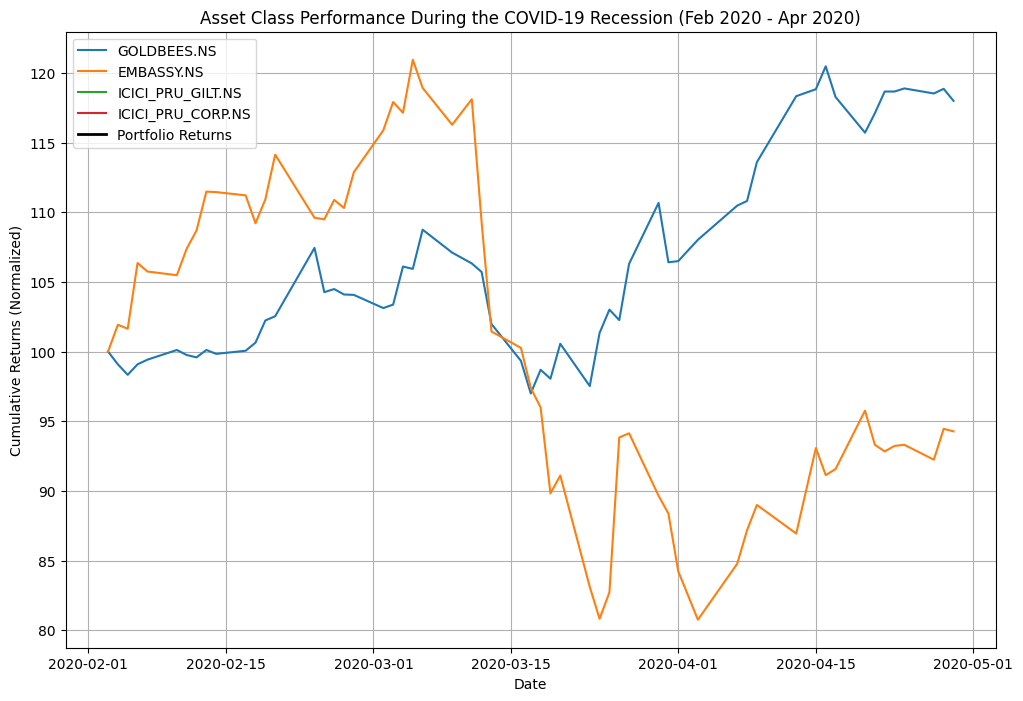

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define tickers for the assets in your portfolio
tickers = ['GOLDBEES.NS', 'EMBASSY.NS', 'ICICI_PRU_GILT.NS', 'ICICI_PRU_CORP.NS']

start_date = '2020-02-01'  # Start date for the COVID-19 recession
end_date = '2020-04-30'  # End date for the COVID-19 recession

# Step 2: Download the historical adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 3: Normalize the data (all starting at 100)
normalized_data = data / data.iloc[0] * 100

# Step 4: Define portfolio allocation (sum must be 1)
weights = [0.10, 0.10, 0.35, 0.15]  # Gold, REITs, Government Bonds, Corporate Bonds

# Ensure weights sum to 1
weights = np.array(weights)
weights = weights / weights.sum()

# Step 5: Calculate daily returns
daily_returns = data.pct_change().dropna()

# Step 6: Calculate portfolio returns
portfolio_daily_returns = daily_returns.dot(weights)
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Step 7: Plot the performance of each asset class
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(normalized_data[ticker], label=ticker)
plt.plot(cumulative_returns, label="Portfolio Returns", linewidth=2, color='black')
plt.title('Asset Class Performance During the COVID-19 Recession (Feb 2020 - Apr 2020)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (Normalized)')
plt.legend()
plt.grid(True)
plt.show()
